# **Time Series**

**What is Time Series Data?**

Imagine data points collected over time, like hourly website traffic, daily stock prices, or monthly sales figures. This type of data, ordered by time, is called time series data.

Unlike regular datasets with independent data points, time series data exhibits certain characteristics:

**Order matters:** The order in which data points are collected is crucial. Analyzing website traffic for Monday makes more sense compared to analyzing it in random order.

**Trends:** Time series data often shows trends over time, like an increase in sales over months or a seasonal variation in temperature.

**Seasonality:** Some data exhibits repeating patterns at specific intervals. For example, ice cream sales might spike during summers.

**Why Analyze Time Series Data?**

Time series analysis unlocks valuable insights from these trends and patterns. Here are some reasons why it's important:

**Forecasting:** Businesses can use time series analysis to predict future trends, like product demand or sales figures. This helps them plan inventory, marketing strategies, and resource allocation.
**Anomaly detection:** Identifying unusual spikes or dips in data can indicate potential problems. For example, a sudden decrease in website traffic might signal technical issues.
**Understanding relationships:** Time series analysis can reveal relationships between different variables. Studying the correlation between temperature and electricity consumption helps predict energy demands.

**Examples of Time Series Data:**

Time series data is used across various fields. Here are some real-world examples:

**Finance:** Stock prices, currency exchange rates, investment returns.

**Marketing:** Website traffic, customer churn rate, social media engagement.

**Environment:** Weather patterns, air pollution levels, water quality measurements.
**Healthcare:** Patient vitals, disease outbreaks, medication adherence.

# **Why Does it Matter**

**1. Trend:**

Impact: Trends represent the overall upward or downward direction of the data over time. Ignoring trends can lead to inaccurate forecasts.
Example: Imagine analyzing monthly sales figures. If there's a consistent upward trend (increasing sales each month), a forecasting model that ignores this trend will consistently underestimate future sales.

**2. Seasonality:**

Impact: Seasonality refers to recurring patterns within a specific time period (e.g., daily, weekly, yearly). If not addressed, seasonality can mask underlying trends and lead to misleading forecasts.
Example: Daily ice cream sales might show a significant peak during summers and a dip during winters. A forecasting model that doesn't account for seasonality might predict a constant average sales figure throughout the year, missing this crucial pattern.

**3. Stationarity:**

Impact: Stationarity refers to the statistical property where the overall statistical characteristics (mean, variance) of a time series remain constant over time. Many forecasting models rely on the assumption of stationarity.
Example: Imagine analyzing hourly stock prices. If the average price and its volatility (how much the price fluctuates) keep changing significantly throughout the day, the data is non-stationary. A forecasting model expecting stationarity might struggle to predict future prices accurately.

**Addressing these issues:**

**Trend:** Forecasting models can be chosen or adapted to account for trends (e.g., linear regression for increasing trends).

**Seasonality:** Techniques like seasonal differencing or decomposition can remove or isolate seasonal patterns before applying forecasting models.

**Stationarity:** Data transformations (e.g., differencing) can be used to make the data stationary, allowing for more reliable forecasting with specific models.
Consequences of Ignoring these Issues:

**Inaccurate Forecasts:** Ignoring trends, seasonality, and stationarity can lead to significantly inaccurate forecasts, potentially causing bad business decisions or missed opportunities.

**Misleading Insights:** Unaddressed trends and seasonality can mask true underlying patterns, hindering the ability to extract meaningful insights from the data.

# **Decomposition:**

**Definition:**

Decomposition involves breaking down a time series into its individual components, such as trend, seasonality, and residuals.

**Importance:**

**Pattern Identification:** Decomposition helps identify and isolate patterns, making it easier to understand the underlying structure of the time series.

**Forecasting:** By separating components, it becomes possible to model and forecast each part independently, improving the accuracy of predictions.

# **Lagging:**
**Definition:**

Lagging involves shifting the time series data by a certain number of time periods.

**Importance:**

**Autocorrelation Analysis:** Lagging is crucial for analyzing autocorrelation, which measures the correlation of a time series with its lagged values.

**Time Shift Analysis:** Examining lagged values can reveal patterns and dependencies over time.

# **Smoothing Techniques:**
**Definition:**

Smoothing techniques, such as moving averages, involve reducing the impact of noise and short-term fluctuations in the data.

**Importance:**

**Noise Reduction:** Smoothing helps reveal underlying trends by minimizing the influence of noisy data points.

**Enhanced Visualization:** Smoothed data can provide a clearer representation of the overall pattern.

**Necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

**Loading Data**

In [2]:
import yfinance as yf

The S&P 500, FTSE 100, DAX, and Nikkei 225 are all major stock market indices representing the performance of leading companies in their respective regions

In [3]:
tickers = ["^GSPC","^GDAXI","^FTSE","^N225"]
data = yf.download(tickers, period="10y")

[*********************100%%**********************]  4 of 4 completed


In [5]:
data = data['Close'].reset_index()

In [6]:
data = data.set_index('Date')
data.head()

Ticker,^FTSE,^GDAXI,^GSPC,^N225
Date,,,,
2014-03-12,6620.899902,9188.690430,1868.199951,14830.389648
2014-03-13,6553.799805,9017.790039,1846.339966,14815.980469
2014-03-14,6527.899902,9056.410156,1841.130005,14327.660156
2014-03-17,6568.399902,9180.889648,1858.829956,14277.669922
2014-03-18,6605.299805,9242.549805,1872.250000,14411.269531


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2603 entries, 2014-03-12 to 2024-03-12
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ^FTSE   2526 non-null   float64
 1   ^GDAXI  2537 non-null   float64
 2   ^GSPC   2518 non-null   float64
 3   ^N225   2445 non-null   float64
dtypes: float64(4)
memory usage: 101.7 KB


In [8]:
data.index.dtype

dtype('<M8[ns]')

In [9]:
data.describe()

Ticker,^FTSE,^GDAXI,^GSPC,^N225
count,2526.000000,2537.000000,2518.000000,2445.000000
mean,7018.821698,12616.009495,3065.554892,22948.506605
std,540.224236,2087.819571,924.979301,5253.320131
min,4993.899902,8441.709961,1815.689941,13910.160156
25%,6705.624878,10951.150391,2163.155090,19251.080078
50%,7137.000000,12447.250000,2832.954956,22036.050781
75%,7446.874878,14039.799805,3960.184998,27433.400391
max,8014.299805,17965.109375,5167.729980,40109.230469


In [ ]:
data.head()

Ticker,^FTSE,^GDAXI,^GSPC,^N225
Date,,,,
2014-03-12,6620.899902,9188.690430,1868.199951,14830.389648
2014-03-13,6553.799805,9017.790039,1846.339966,14815.980469
2014-03-14,6527.899902,9056.410156,1841.130005,14327.660156
2014-03-17,6568.399902,9180.889648,1858.829956,14277.669922
2014-03-18,6605.299805,9242.549805,1872.250000,14411.269531


In [10]:
data.isna().sum()

Ticker
^FTSE      77
^GDAXI     66
^GSPC      85
^N225     158
dtype: int64

In [11]:
data.asfreq('D').info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3654 entries, 2014-03-12 to 2024-03-12
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ^FTSE   2526 non-null   float64
 1   ^GDAXI  2537 non-null   float64
 2   ^GSPC   2518 non-null   float64
 3   ^N225   2445 non-null   float64
dtypes: float64(4)
memory usage: 142.7 KB


# **Plotting**

In [12]:
import matplotlib.pyplot as plt

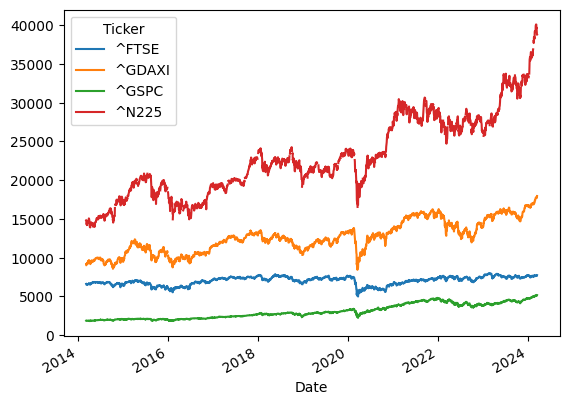

In [13]:
data.plot()
plt.show()

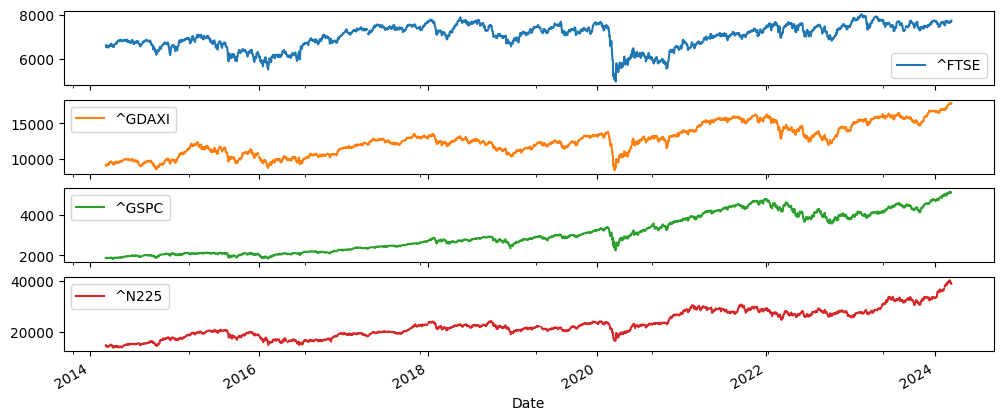

In [ ]:
data.plot(figsize=(12,5),subplots=True)
plt.show()

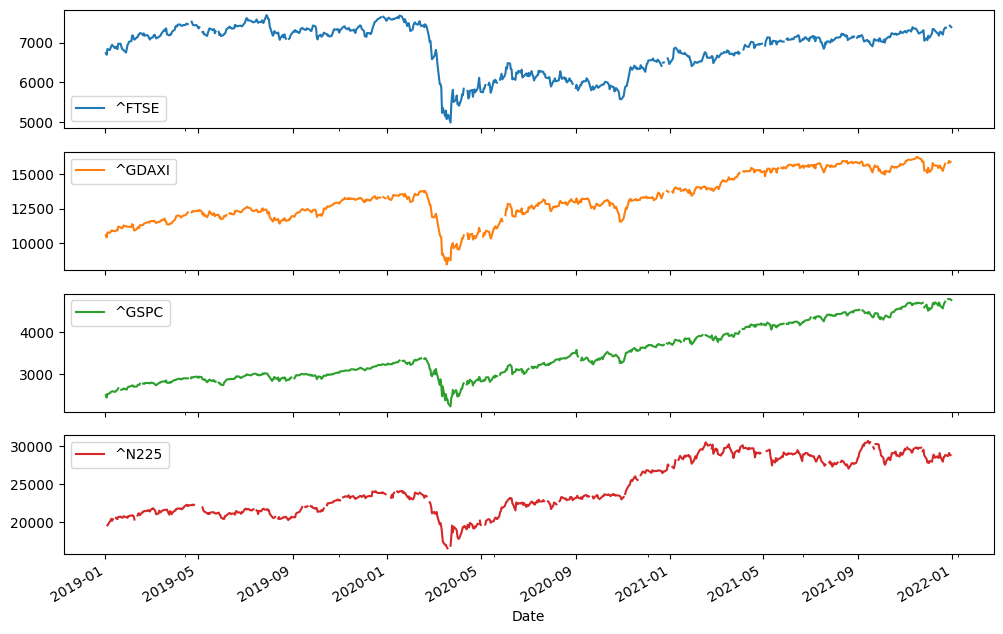

In [15]:
data.loc['2019':'2021'].plot(figsize=(12,8),subplots=True)
plt.show()

<Axes: xlabel='Date'>

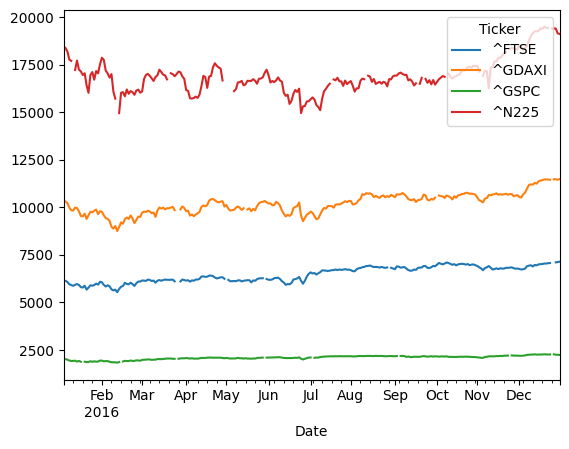

In [ ]:
data.loc['2016'].plot()

# **Frequency Setting**

In [ ]:
data.asfreq('B').info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2610 entries, 2014-03-12 to 2024-03-12
Freq: B
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ^FTSE   2526 non-null   float64
 1   ^GDAXI  2537 non-null   float64
 2   ^GSPC   2517 non-null   float64
 3   ^N225   2445 non-null   float64
dtypes: float64(4)
memory usage: 102.0 KB


# **Handling Missingness**

### **1. Forward Fill or Back Fill:**

**Method:** Propagate the last known value forward (forward fill) or use the next available value backward (back fill).

**Pros:** Retains the same number of observations but may introduce bias.

**Cons:** Assumes continuity in the time series.


In [16]:
df1 = data.copy()

In [17]:
df1.columns

Index(['^FTSE', '^GDAXI', '^GSPC', '^N225'], dtype='object', name='Ticker')

In [18]:
df1.isna().sum()

Ticker
^FTSE      77
^GDAXI     66
^GSPC      85
^N225     158
dtype: int64

In [19]:
filt_df = df1.loc['2014']

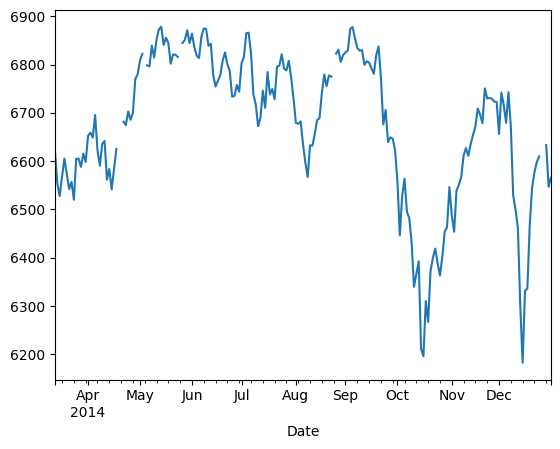

In [20]:
filt_df['^FTSE'].plot()
plt.show()

In [21]:
# Forward fill missing values
filt_df['forward_filled'] = filt_df['^FTSE'].fillna(method='ffill')


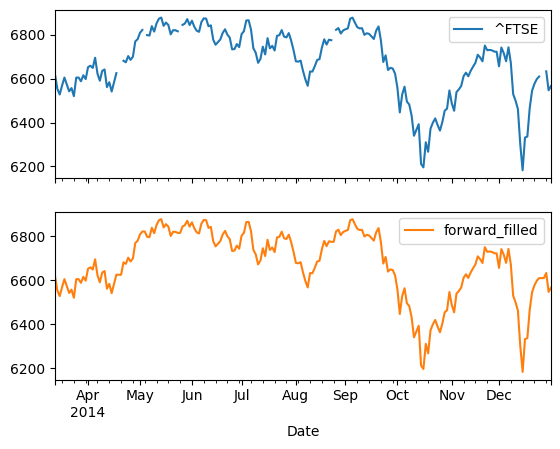

In [22]:
filt_df[['^FTSE','forward_filled']].plot(subplots=True)
plt.show()

In [23]:
# Back fill missing values

filt_df['back_filled'] = filt_df['^FTSE'].fillna(method='bfill')

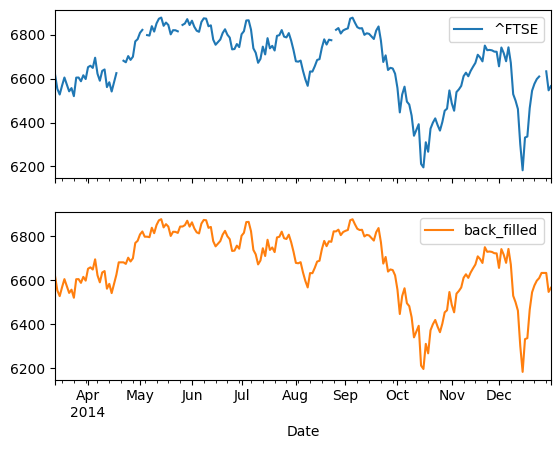

In [24]:
# Forward fill missing values

filt_df[['^FTSE','back_filled']].plot(subplots=True)
plt.show()

### **2. Interpolation:**

**Method:** Use interpolation methods to estimate missing values based on the surrounding data points.

**Pros:** Provides a more nuanced estimate compared to forward fill or back fill.

**Cons:** Sensitive to extreme values and outliers.

In [25]:
# Linear interpolation
filt_df['interpoled'] = filt_df['^FTSE'].interpolate(method='linear')


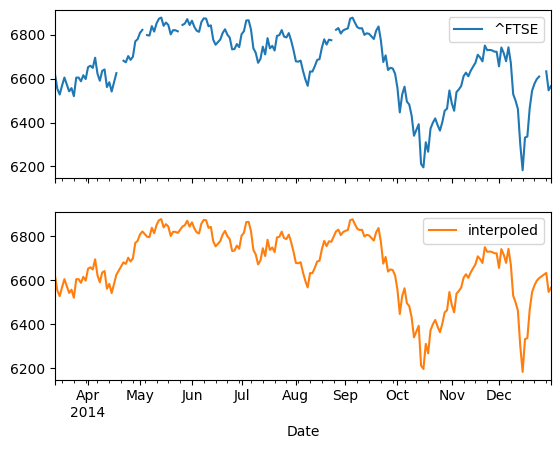

In [26]:
filt_df[['^FTSE','interpoled']].plot(subplots=True)
plt.show()

### **Mean, Median, or Mode Imputation:**

**Method:** Replace missing values with the mean, median, or mode of the available data.

**Pros:** Simple and can be effective for imputing missing values.

**Cons:** Ignores variations in the time series.

In [27]:
mean_value = filt_df['^FTSE'].mean()
mean_value

6674.0009861366425

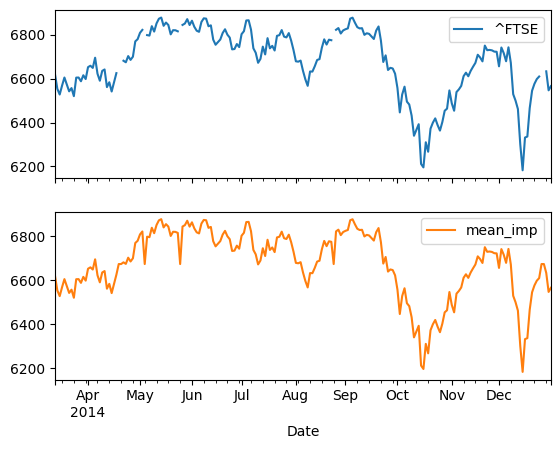

In [28]:
filt_df['mean_imp'] = filt_df['^FTSE'].fillna(mean_value)
filt_df[['^FTSE','mean_imp']].plot(subplots=True)
plt.show()

### **Seasonal Imputation:**

**Method:** Replace missing values with the corresponding value from the same season in previous or subsequent years.

**Pros:** Captures seasonality in the data.

**Cons:** Requires sufficient historical data for the same season.

In [29]:
# Seasonal imputation (assuming seasonality repeats annually)
filt_df['seasonal_imp'] = filt_df['^FTSE'].fillna(filt_df.groupby(filt_df.index.month)['^FTSE'].transform('mean'))


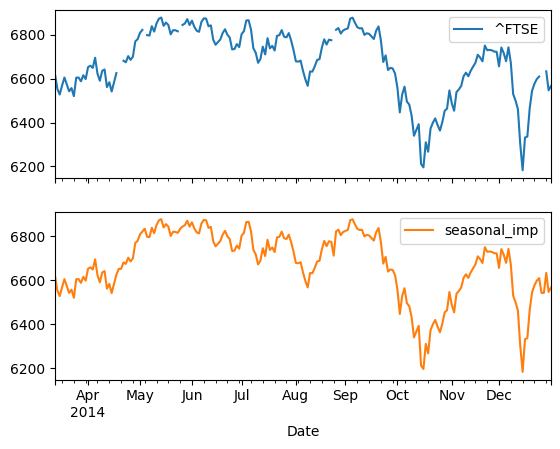

In [30]:
filt_df[['^FTSE','seasonal_imp']].plot(subplots=True)
plt.show()

In [ ]:
filt_df.columns

Index(['^FTSE', '^GDAXI', '^GSPC', '^N225', 'forward_filled', 'back_filled',
       'interpoled', 'mean_imp', 'seasonal_imp'],
      dtype='object', name='Ticker')

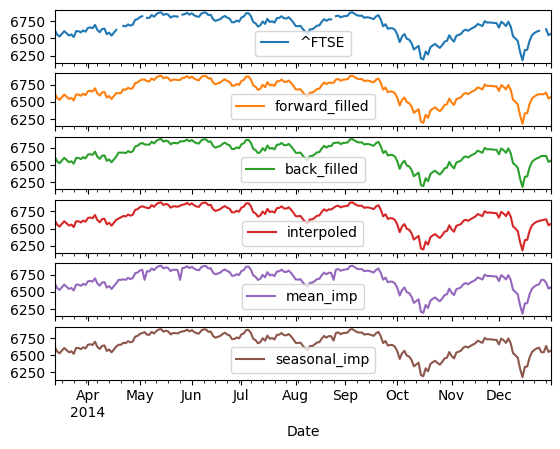

In [31]:
filt_df[['^FTSE','forward_filled', 'back_filled',
       'interpoled', 'mean_imp', 'seasonal_imp']].plot(subplots=True)
plt.show()

# **Splitting the Data**

In [ ]:
data.head()

Ticker,^FTSE,^GDAXI,^GSPC,^N225
Date,,,,
2014-03-12,6620.899902,9188.690430,1868.199951,14830.389648
2014-03-13,6553.799805,9017.790039,1846.339966,14815.980469
2014-03-14,6527.899902,9056.410156,1841.130005,14327.660156
2014-03-17,6568.399902,9180.889648,1858.829956,14277.669922
2014-03-18,6605.299805,9242.549805,1872.250000,14411.269531


In [32]:
size = int(len(data)*0.8)
size

2082

In [ ]:
df_train = data.iloc[:size]
df_test = data.iloc[size:]

In [ ]:
print(df_train.shape)
print(df_test.shape)

(2082, 4)
(521, 4)


In [ ]:
df_train.tail()

Ticker,^FTSE,^GDAXI,^GSPC,^N225
Date,,,,
2022-03-07,6959.500000,12834.650391,4201.089844,25221.410156
2022-03-08,6964.100098,12831.509766,4170.700195,24790.949219
2022-03-09,7190.700195,13847.929688,4277.879883,24717.529297
2022-03-10,7099.100098,13442.099609,4259.520020,25690.400391
2022-03-11,7155.600098,13628.110352,4204.310059,25162.779297


In [ ]:
df_test.head()

Ticker,^FTSE,^GDAXI,^GSPC,^N225
Date,,,,
2022-03-14,7193.500000,13929.110352,4173.109863,25307.849609
2022-03-15,7175.700195,13917.269531,4262.450195,25346.480469
2022-03-16,7291.700195,14440.740234,4357.859863,25762.009766
2022-03-17,7385.299805,14388.059570,4411.669922,26652.890625
2022-03-18,7404.700195,14413.089844,4463.120117,26827.429688


# **White Noise**

In [ ]:
# Pick a stock

nikkei = data[[]'^N225']

Date
2014-03-12    14830.389648
2014-03-13    14815.980469
2014-03-14    14327.660156
2014-03-17    14277.669922
2014-03-18    14411.269531
                  ...     
2024-03-06    40090.781250
2024-03-07    39598.710938
2024-03-08    39688.941406
2024-03-11    38820.488281
2024-03-12    38797.511719
Name: ^N225, Length: 2603, dtype: float64

In [ ]:
data.columns

Index(['^FTSE', '^GDAXI', '^GSPC', '^N225'], dtype='object', name='Ticker')

In [ ]:
# np.random.normal(mean, std_dev, num_samples)
# Generate white noise corresponding to Nikkei

In [33]:
white_noise = np.random.normal(data['^N225'].mean(),data['^N225'].std(),size=len(data))
data['white_noise'] = white_noise

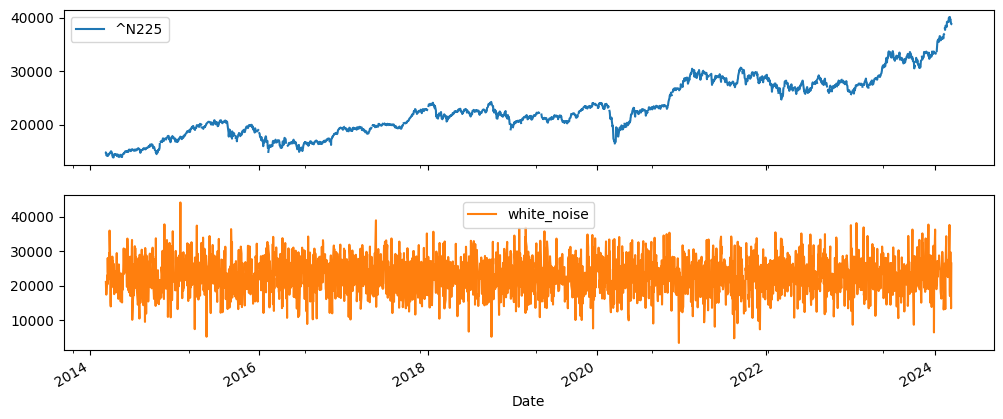

In [34]:
data[['^N225','white_noise']].plot(figsize=(12,5),subplots=True)
plt.show()